## imports

In [1]:
import os
import torch
import pickle
import umap

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from NDNT.modules.layers import *
from NDNT.networks import *
from NDNT.utils.DanUtils import imagesc

# setup paths
iteration = 1 # which version of this tutorial to run (in case want results in different dirs)
NBname = 'color_cloud_initial{}'.format(iteration)

myhost = os.uname()[1] # get name of machine
print("Running on Computer: [%s]" %myhost)

datadir = './Mdata/'

device = torch.device("cuda:1")
dtype = torch.float32

%load_ext autoreload
%autoreload 2

Invoking __init__.py for NDNT.utils
Running on Computer: [beast]


Loading expt04
  Time embedding...
11 cells, 362504 time steps.


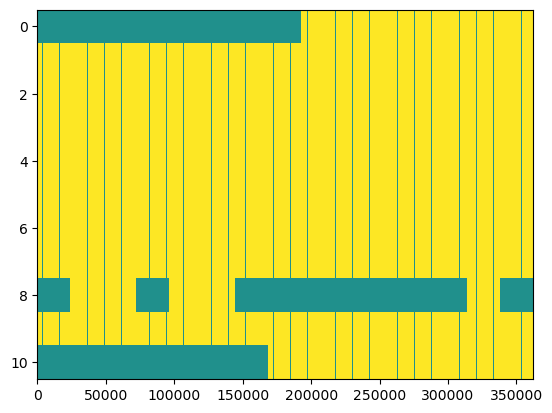

In [2]:
# Load Data
num_lags = 10
expts = ['expt04']
# this can handle multiple experiments
#expts = ['expt04', 'expt05']

from NTdatasets.cumming.monocular import MultiDataset
data = MultiDataset(
    datadir=datadir, filenames=expts, include_MUs=False,
    time_embed=True, num_lags=num_lags )
imagesc(data.dfs.detach().numpy())
print("%d cells, %d time steps."%(data.NC, data.NT))

## basic stats

In [3]:
data.SUs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [4]:
data.NC, data.robs.shape, data.stim_dims, data.dfs

(11,
 torch.Size([362504, 11]),
 [1, 36, 1, 10],
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 1., 1.,  ..., 0., 1., 1.],
         [1., 1., 1.,  ..., 0., 1., 1.],
         [1., 1., 1.,  ..., 0., 1., 1.]]))

In [5]:
data.stim[0,:]

tensor([ 0.,  1., -1., -1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         1., -1.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  1.,  0.,  0.,  1.,  0.,
        -1.,  1.,  0., -1.,  1.,  0., -1.,  1.,  0., -1., -1., -1.,  0.,  0.,
         1.,  0.,  1.,  1.,  0., -1., -1.,  0.,  0.,  1.,  1.,  0.,  1., -1.,
         0.,  0., -1.,  1.,  0.,  1.,  0., -1.,  1.,  1.,  1.,  1.,  0.,  0.,
         0.,  1.,  1.,  1.,  0.,  1., -1.,  0.,  1.,  0.,  0.,  1., -1.,  1.,
         0.,  0.,  1.,  0.,  0., -1.,  0.,  1., -1.,  0.,  1.,  0.,  0.,  1.,
         0.,  1.,  0., -1.,  0.,  1.,  0., -1.,  0.,  1.,  0.,  0.,  0., -1.,
        -1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1., -1.,  1.,  0.,  0.,  0.,  0., -1., -1.,  1., -1.,  1.,  0., -1.,
         0., -1.,  0.,  1.,  0.,  0.,  1., -1.,  0., -1.,  0.,  1.,  1.,  0.,
         0.,  1.,  1.,  0., -1.,  1.,  0., -1.,  1.,  1.,  1.,  0., -1., -1.,
         1.,  0.,  0.,  0.,  1., -1., -1., -1.,  0.,  0.,  1., -

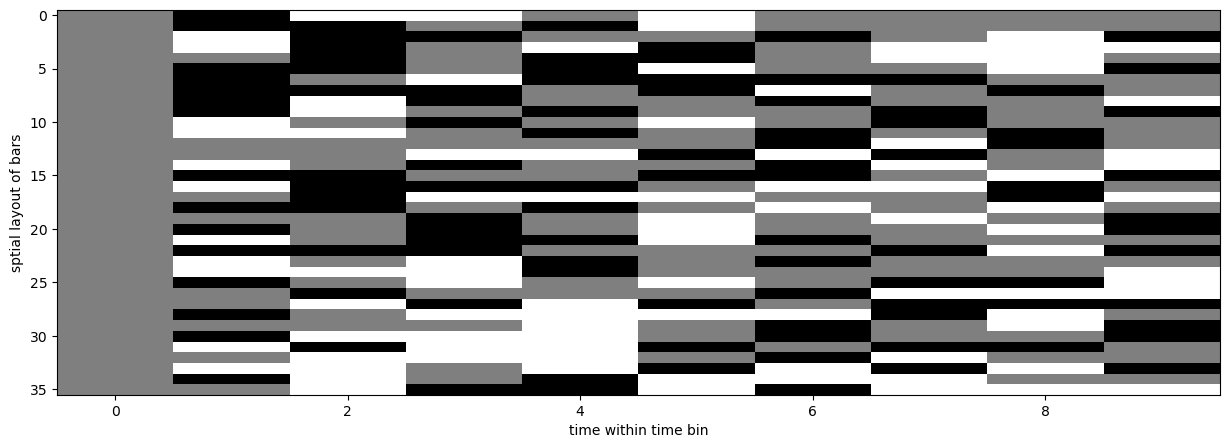

In [6]:
plt.figure(figsize=(15,5))
plt.imshow(data.stim[0,:].reshape((36,10)), aspect='auto', cmap='binary')
plt.xlabel("time within time bin")
plt.ylabel("sptial layout of bars")
plt.show()

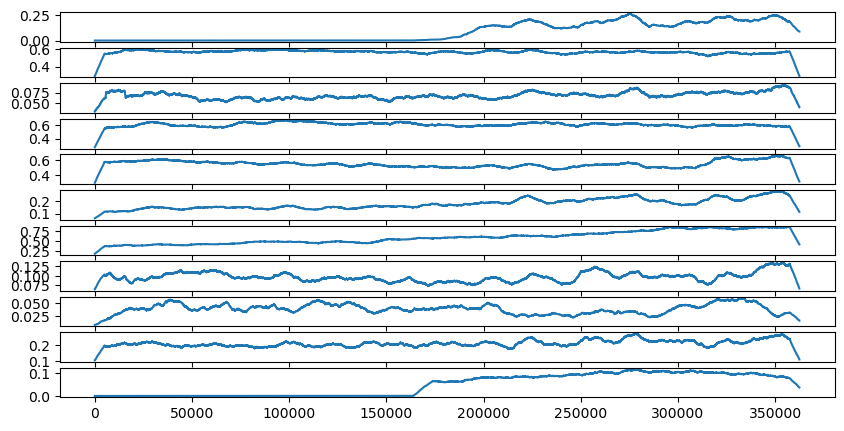

In [7]:
# plot the 11 neurons firing smoothed over time 
plt.figure(figsize=(10,5))
for c in range(data.robs.shape[1]):
    plt.subplot(data.robs.shape[1], 1, c+1)
    plt.plot(np.convolve(data.robs[:,c], np.ones(10000)/10000, mode='same'))
plt.show()

## PCA

In [8]:
# make a PCA model with S = 3
# this initializes the PCA object with 3 dimensions
pca_model = PCA(n_components=3)

# perform the dimensionality reduction
PCs = pca_model.fit_transform(data.robs)
proj = pca_model.transform(data.robs)
PCs.shape, data.NT, data.robs.shape

((362504, 3), 362504, torch.Size([362504, 11]))

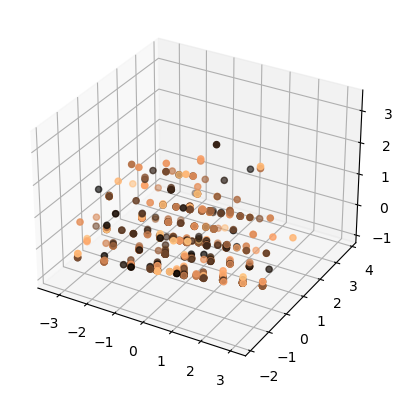

In [9]:
#%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
numpoints = 1000
ax.scatter(PCs[:numpoints,0], PCs[:numpoints,1], PCs[:numpoints,2], c=range(data.NT)[:numpoints], cmap='copper')
plt.show()

## UMAP

In [10]:
# fit the neurons over time and trials
# COMMENTED OUT BECAUSE IT TAKES A LONG TIME TO RUN (MINUTES)
#reducer = umap.UMAP()
#scaled_R = StandardScaler().fit_transform(data.robs)
#neuron_embedding = reducer.fit_transform(scaled_R)
#with open('umap1.pickle', 'wb') as f: # save out the file
#    pickle.dump(neuron_embedding, f)

# load the embeddings
with open('umap1.pickle', 'rb') as f:
    neuron_embedding = pickle.load(f)

In [11]:
neuron_embedding.shape

(362504, 2)

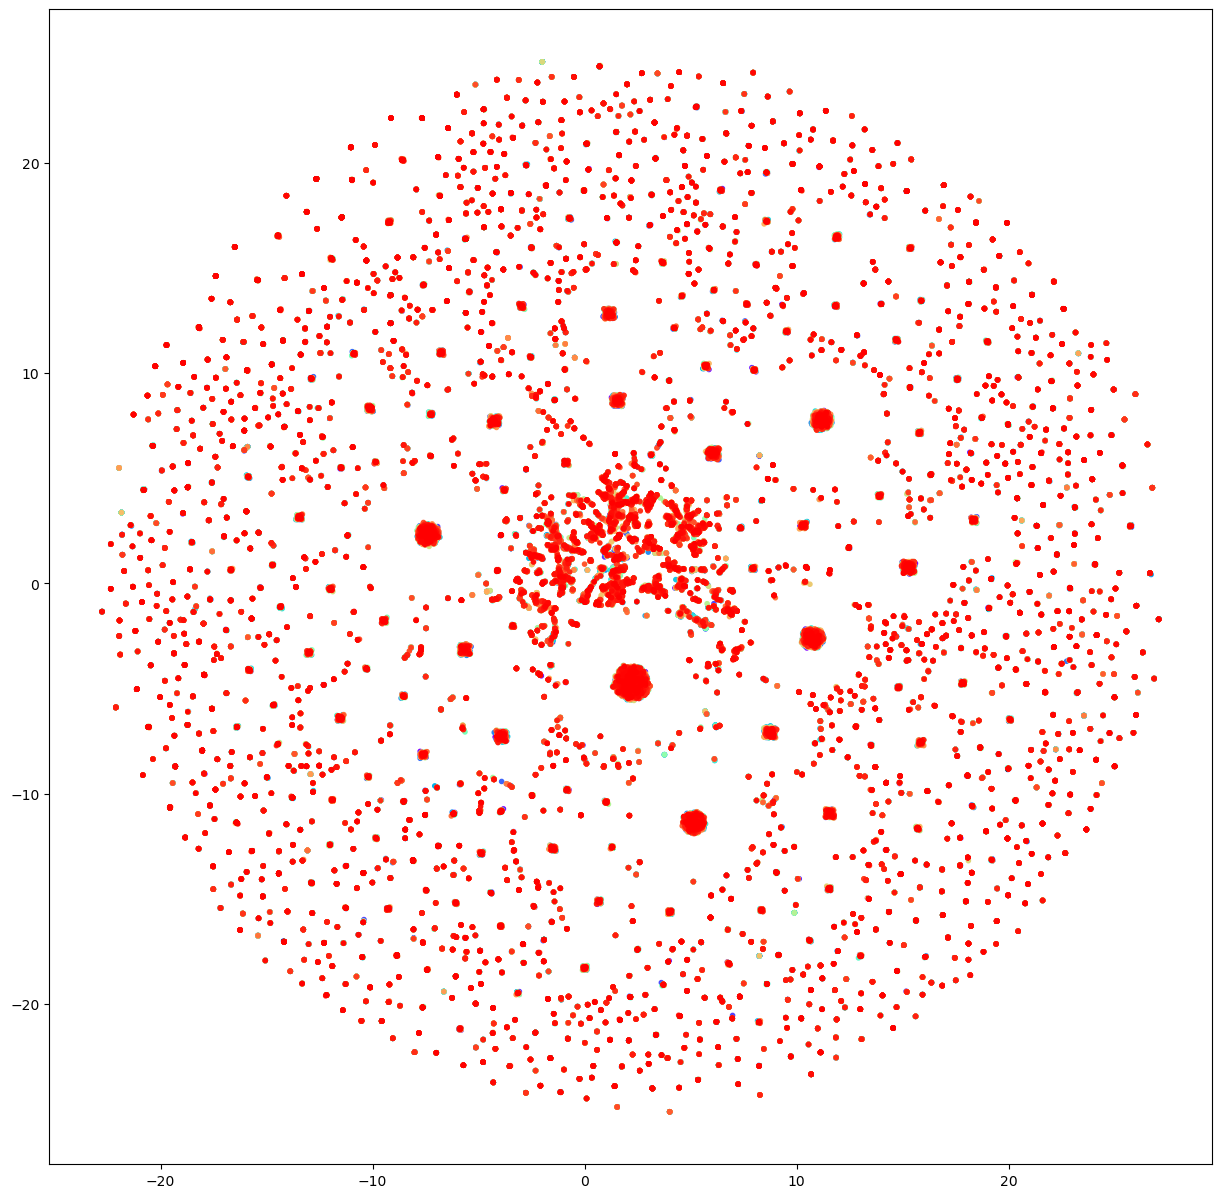

In [12]:
# plot it
plt.figure(figsize=(15,15))
plt.scatter(neuron_embedding[:,0], neuron_embedding[:,1], c=range(data.NT), cmap='rainbow', marker='.')
plt.show()